Date Created: July 7th, 2022

---
## Project 1: Thermal Explosion
**Authors:** Tyler Reiser, Brian Tan, Mason Friedberg   
**Class:** APPM 4650   
**Summary:** Modeling a thermal explosion created by putting chemicals in a box.   

---

The *temperature*, $T$ is a function of *time*, $t$, so $T = T(t)$. This explosion will start at room temperature, $T_0$. Note that all temperature's used will be *absolute* and are used in Kelvin. 

#### Reaction Kinetics
... *write about physics here* ... 

#### Scaling
This is a stiff differential equation, so we have to scale the step size to ensure the explosion is approximated numerically. 

The equations is scaled two times in the following ways:
1. 
2. 

#### Non-Adiabatic, Scaled Equation
The *temperature*, $T$, is a function of *time*, $t$, so $T = T(t)$. This process will begin at room temperature and labeled as $T_0$. 
>All temperature's must be *absolute*, ie. Kelvin 

Equation to be solved: $\frac{d\theta}{d\sigma} = \delta e^\theta-\theta$ for $\theta (0) = 0$

For any real number, $\delta$, we have three cases:
1. if $\delta e^\theta > \theta$, then $\theta$ grows exponentially   
2. if $\delta e^\theta < \theta$, then $\theta$ decreases for a while   
3. if $\delta e^\theta = \theta$ or $\delta e^\theta = 1$ , then an *oscilation point* exists

Fix $\delta$ so that $\delta > \frac{1}{e}$ to ensure $\delta e^\theta > \theta$.


In [1]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook 
plt.style.use('bmh')

In [2]:
# time mesh
t0 = 0.
dt = 0.009  # time step must be sufficiently small
tmax = 1.
vector_t = np.arange(t0, tmax, dt) # time-scale
n = len(vector_t)

# delta values
oscillation_point = 1/np.e
delta_fizzle = oscillation_point - 1
delta_explosion = oscillation_point + 1

# initial conditions
theta = 0 # initial temp, ie. THETA(0) = 0
rk4_data = np.zeros((n, 1))
rk4_data[0, 0] = theta

k1 = np.array([0., 0., 0.])
k2 = np.array([0., 0., 0.])
k3 = np.array([0., 0., 0.])
k4 = np.array([0., 0., 0.])

Now define the equations.

In [3]:
def equation_1(t, theta, delta):
    return delta*np.exp(theta) - theta

### Fourth-order Runge Kutta 
Now define RK4.

In [4]:
def RK4(t, theta, equation_1, delta, dt):
    k1[0] = dt*equation_1(t, theta, delta)
    k2[0] = dt*equation_1(t + dt/2., theta + k1[0]/2., delta)
    k3[0] = dt*equation_1(t + dt/2., theta + k2[0]/2., delta)
    k4[0] = dt*equation_1(t + dt, theta + k3[0], delta)

    theta = theta + (1./6.)*(k1[0] + 2.*k2[0] + 2.*k3[0] + k4[0])
    return theta

### Plotting the three cases
This is sloppy

/var/folders/yy/tgnx4yvs65n5w70kcy3_2b000000gn/T/ipykernel_21598/1697203138.py:2: RuntimeWarning: overflow encountered in exp
  return delta*np.exp(theta) - theta
/var/folders/yy/tgnx4yvs65n5w70kcy3_2b000000gn/T/ipykernel_21598/1697203138.py:2: RuntimeWarning: invalid value encountered in double_scalars
  return delta*np.exp(theta) - theta


<IPython.core.display.Javascript object>


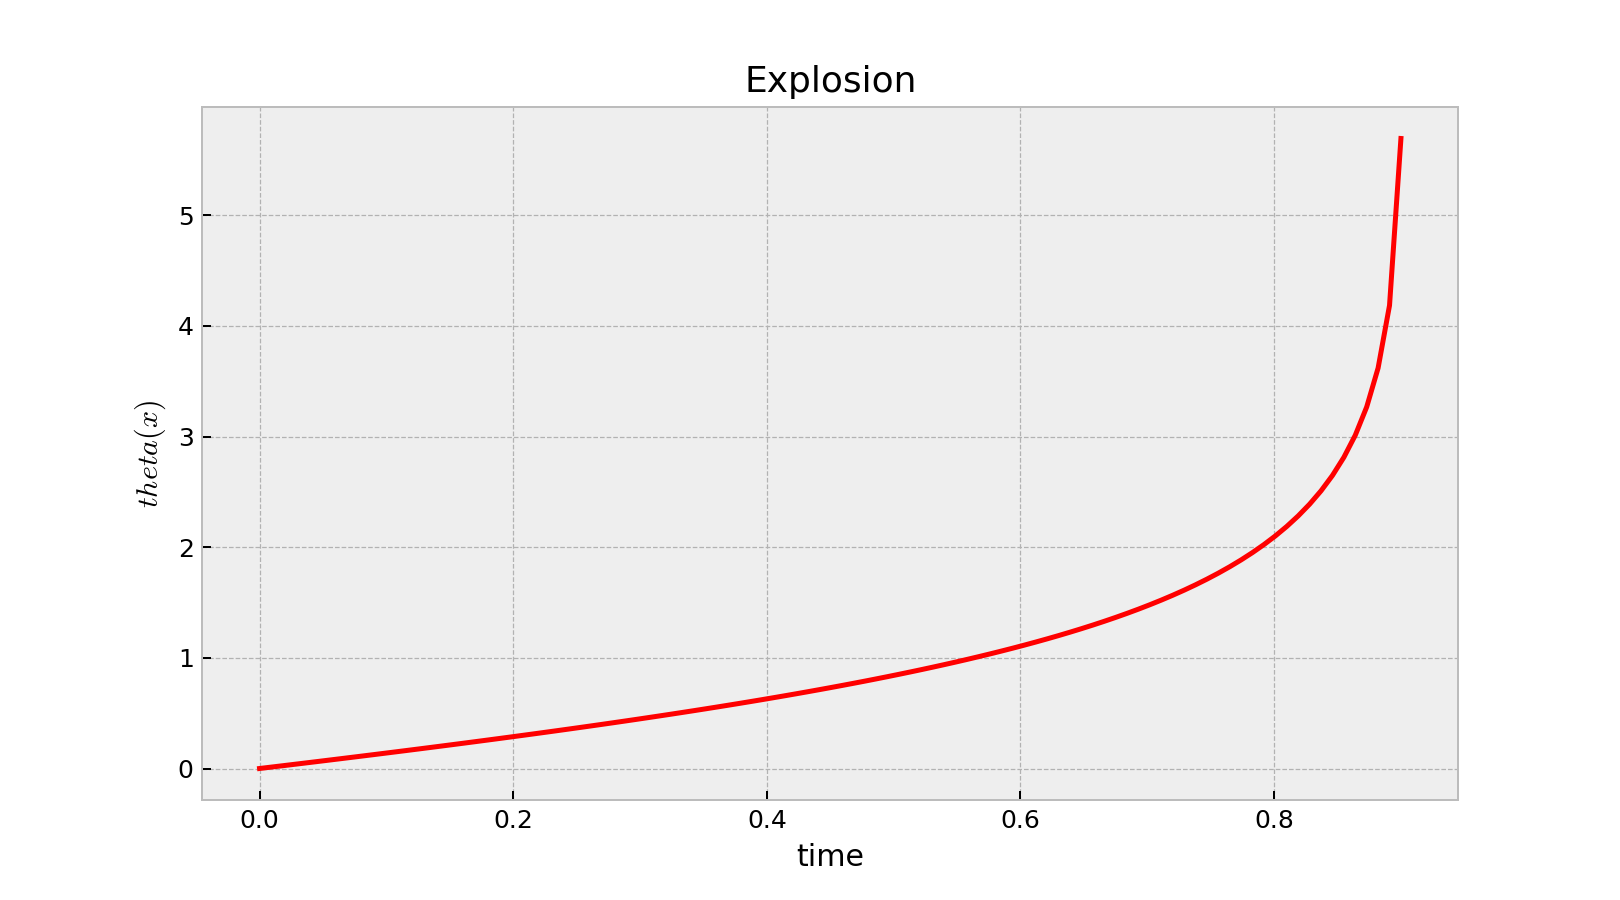

<IPython.core.display.Javascript object>


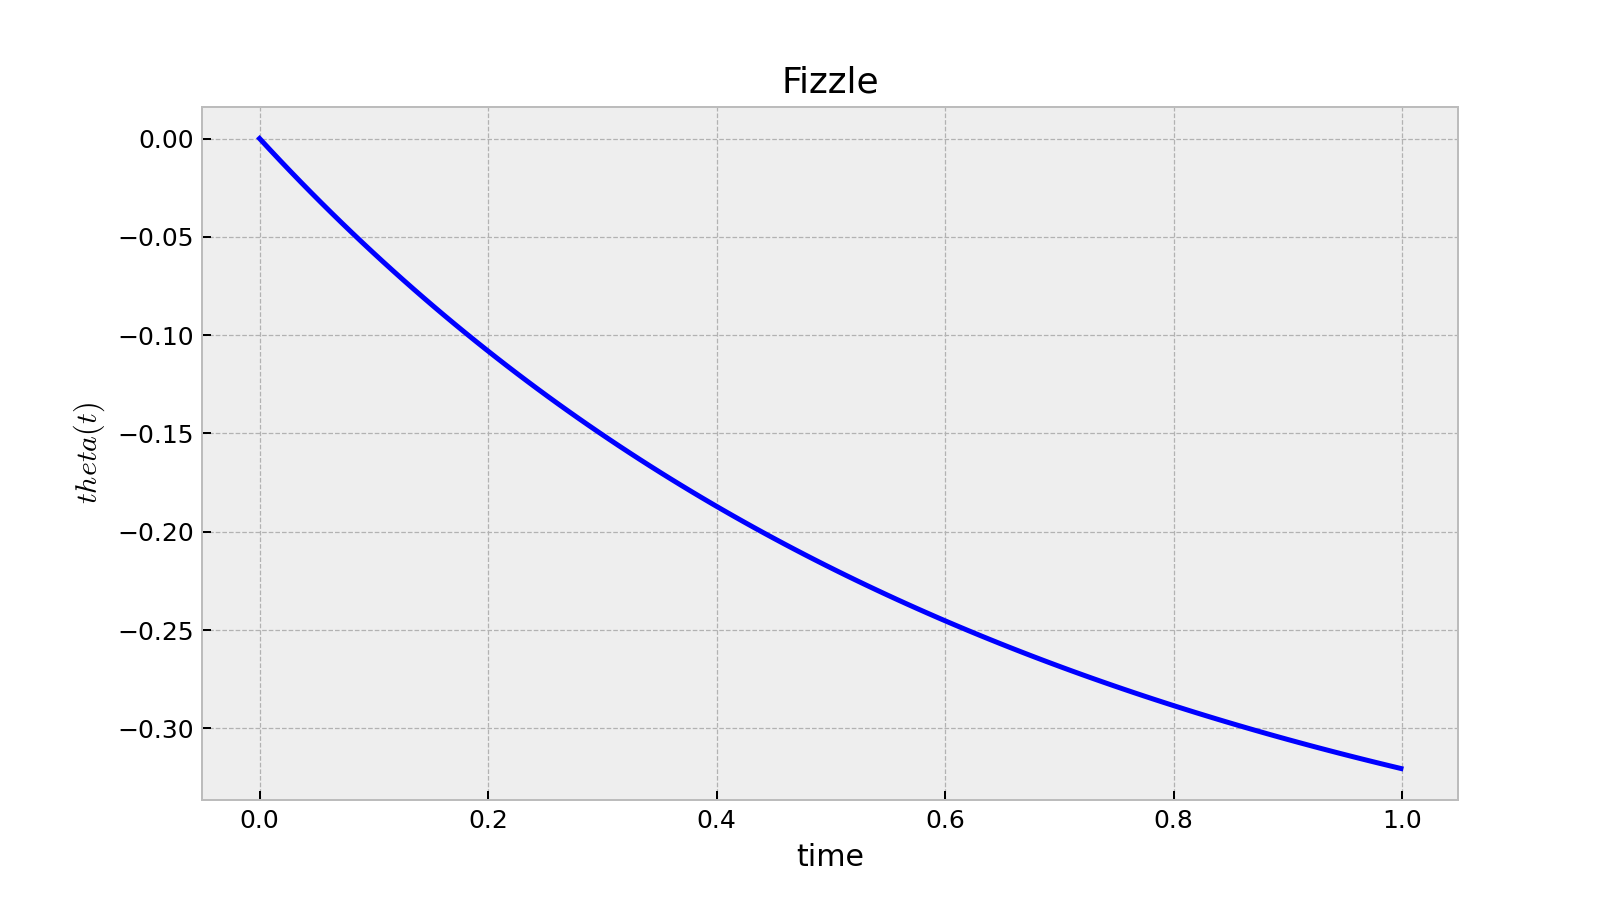

<IPython.core.display.Javascript object>


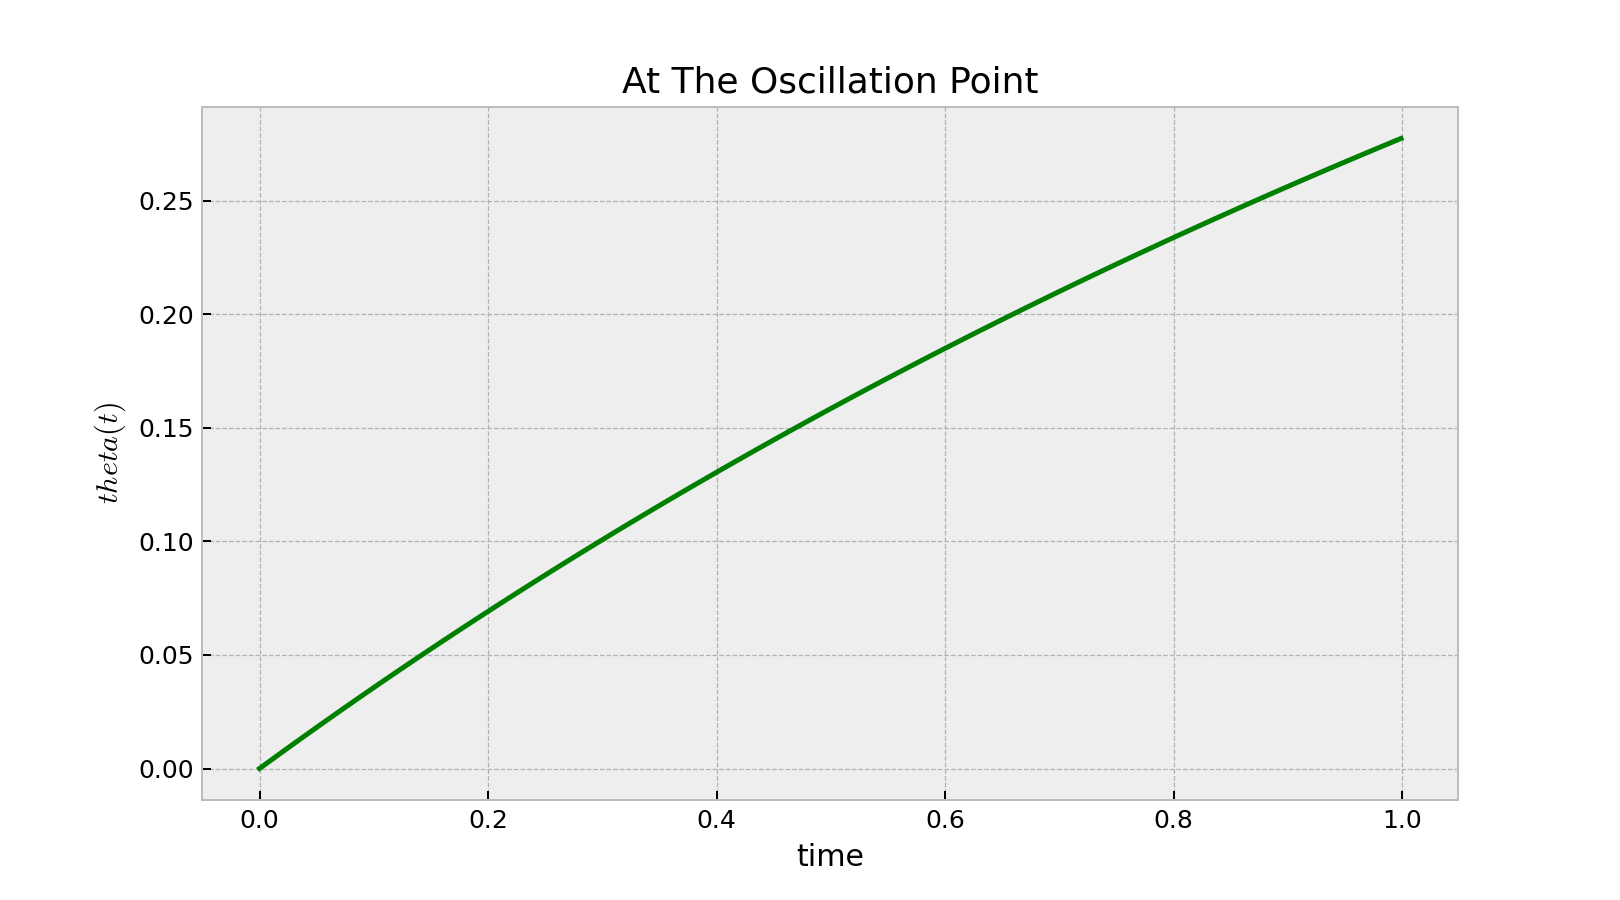

In [5]:
for i in range(n - 1):
    rk4_data[i+1, :] = RK4(vector_t[i], rk4_data[i, 0], equation_1, delta_explosion, dt)

plt.figure('Project-1 Reaction Explosion', figsize=(9, 5))
plt.title('Explosion')
plt.ylabel('$theta (x)$')
plt.xlabel('time')
plt.plot(vector_t[:], rk4_data[:], color='r')


for i in range(n - 1):
    rk4_data[i+1, :] = RK4(vector_t[i], rk4_data[i, 0], equation_1, delta_fizzle, dt)

plt.figure('Project-1 Reaction Fizzle', figsize=(9, 5))
plt.title('Fizzle')
plt.ylabel('$theta (t)$')
plt.xlabel('time')
plt.plot(vector_t[:], rk4_data[:], color='b')


for i in range(n - 1): 
    rk4_data[i+1, :] = RK4(vector_t[i], rk4_data[i, 0], equation_1, oscillation_point, dt)

plt.figure('Project-1 Reaction Oscillation Point', figsize=(9, 5))
plt.title('At The Oscillation Point')
plt.ylabel('$theta (t)$')
plt.xlabel('time')
plt.plot(vector_t[:], rk4_data[:], color='g')